<div style='background-color: #ffcccc; padding: 15px; border-radius: 5px; margin-bottom: 20px; color: black; border-left: 5px solid red;'>
    <h1 style='text-align: center; margin: 0; color: red;'>Áp dụng thuật toán di truyền (Genetic Algorithm) cho bài toán hồi quy tuyến tính (Linear Regression)</h1>
</div>



<div style='background-color:  #fffbe6; padding: 15px; border-radius: 5px; margin-bottom: 20px; color: black; border-left: 5px solid red;'>
    <h1 style='text-align: center; margin: 0; color: red;'>Nhắc lại code linear regression - sử dụng traning với m samples (mini - batch)</h1>
</div>


[4.95125758 6.3451566 ]


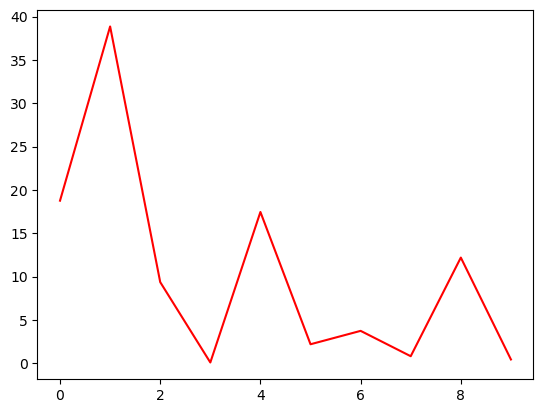

In [179]:
# xử lý dữ liệu đầu vào

import numpy as np
import matplotlib.pyplot as plt
import random

## 1) Đọc được file dữ liệu data.csv thành dạng np.array
def get_data(file_can_doc):
    data = np.genfromtxt("data.csv", delimiter = ',');
    #print("Sau đây là bộ data dữ liệu đã được đọc:");
    #print(data);
    ## 2) Xử lý features và lable:
    X_data = data[:, :1];
    y_data = data[:, 1];
    #print(X_data);
    #print(y_data);
    return X_data, y_data

def mean_normalization(X_data):
    N = len(X_data);
    maxi = np.max(X_data);
    mini = np.min(X_data);
    avg = np.mean(X_data);
    X_data = (X_data - avg) / (maxi - mini);
    X_data = np.c_[np.ones((N,1)), X_data]
    return X_data

# Các hàm chính trong mô hình hồi quy
def create_theta():
    theta_1 = random.gauss(mu = 0.0, sigma = 0.01)
    theta_2 = random.gauss(mu = 0.0, sigma = 0.01)
    theta = np.array((theta_1, theta_2))
    return theta

def compute_loss(X_data, theta, y_data, minibatch_size):
    y_hat = X_data.dot(theta)
    current_sum = np.sum((y_hat - y_data) ** 2)
    loss = current_sum / minibatch_size
    return loss

def compute_gradient(X_data, y_data, theta):
    y_hat = X_data.dot(theta)
    dtheta = X_data.T.dot(2 * (y_hat - y_data));
    return dtheta

def update_weight(theta, dtheta, lr, minibatch_size):
    theta = theta - lr * (dtheta / minibatch_size)
    return theta

def mini_batch_gradient_descent(X_data, y_data, lr, minibatch_size, n_epochs):
    thetas = create_theta()
    thetas_path = []
    losses = []
    N = len(X_data)
    X_b = mean_normalization(X_data)
    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(N)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y_data[shuffled_indices]
        
        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            # Tính y_hat và tính loss
            loss = compute_loss(xi, thetas, yi, minibatch_size)
            # Tính gradient
            dthetas = compute_gradient(xi, yi, thetas)
            # Cập nhật theta
            thetas =  update_weight(thetas, dthetas, lr, minibatch_size)
            # logging
            thetas_path.append(thetas)
            losses.append(loss)

    return thetas, losses

if __name__ == "__main__":
    X_data, y_data = get_data("data.csv");
    lr = 0.1
    minibatch_size, n_epochs = 3, 66
    thetas, losses = mini_batch_gradient_descent(X_data, y_data, lr, minibatch_size, n_epochs)    
    print(thetas)
    x_axis = list(range(10))
    plt.plot(x_axis,losses[:10], color="r")
    plt.show()  

<div style='background-color:  #fffbe6; padding: 15px; border-radius: 5px; margin-bottom: 20px; color: black; border-left: 5px solid red;'>
    <h1 style='text-align: center; margin: 0; color: red;'>Sử dụng giải thuật GA để tối ưu hóa và dự đoán mô hình</h1>
</div>


[[1.   1.2 ]
 [1.   1.86]
 [1.   2.09]
 [1.   3.05]
 [1.   4.69]
 [1.   3.57]
 [1.   5.55]
 [1.   2.39]
 [1.   3.94]]
[2.43 2.91 3.41 4.71 5.94 5.4  7.04 3.38 5.29]


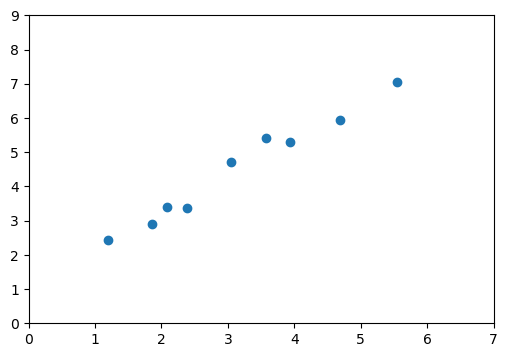

In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt


data = np.genfromtxt("data.csv", delimiter = ',', skip_header = 1)
X = data[:,:1]
y = data[:, 1]

X = np.c_[np.ones((X.shape[0], 1)), X]
print(X)
print(y)

# plot đồ thị
fig, ax = plt.subplots(figsize = (6,4))
ax.set_ylim((0, 9))
ax.set_xlim((0, 7))

plt.scatter(X[:, 1], y)
plt.show()

In [120]:
###-------------------------------BUILD MODULE---------------------------------#
def generate_random_value(bound = 100):
    return (random.random()*2 - 1)*bound

def create_individual(n):
    return [generate_random_value() for _ in range(n)];

def create_ppopulation(n, m):
    return [create_individual(n) for _ in range(m)]

def compute_loss(X_data, y_data, individual):
    theta = np.array(individual)
    y_hat = X_data.dot(theta.T)
    current_sum = np.sum((y_hat - y_data) ** 2)
    loss = current_sum / X_data.shape[0]
    return loss

def compute_fitness(population):
    loss = compute_loss(X_data, y_data, population)
    fitness = 1 / (loss + 1e-6)
    return fitness

def selection(sorted_old_generation):
    index1 = random.randint(0, m - 1);
    index2 = random.randint(0, m - 1);

    while index2 == index1:
        index2 = random.randint(0, m - 1);

    individual_s = sorted_old_generation[index1]
    if index2 > index1:
        individual_s = sorted_old_generation[index2]
    return individual_s

def crossover(parent1, parent2, crossover_rate):
    n = len(parent1)
    parent_1c = parent1[::-1] # tạo ra bản sao rồi gán parent_1c
    parent_2c = parent2[::-1]

    for i in range(n):
        if random.random() < crossover_rate:
            parent_1c[i] = parent2[i];
            parent_2c[i] = parent1[i];

    return parent_1c, parent_2c

def mutation(child, mutation_rate):
    n = len(child)
    child_c = child[::-1]
    for i in range(n):
        if random.random() < mutation_rate:
            child_c[i] =  generate_random_value()

    return child_c
        
###--------------------------VÀO GIẢI THUẬT CHÍNH------------------------###
def genetic_algorithsm(population, X_data, y_data, crossover_rate, mutation_rate):
    m, n = len(population), len(population[0])
    population_start = population
    losses = []
    n_generation = 3000;

    elitism = 2;
    for i in range(n_generation):
        population_sort = sorted(population_start, key = compute_fitness)

        if i % 100 == 0:
            losses.append(compute_loss(X_data, y_data, population_sort[-1]))
            print("Best loss: ", compute_loss(X_data, y_data, population_sort[-1]), population_sort[-1])

        # create new_population
        new_population = population_sort[-elitism:]
        while (len(new_population) < m):
            # selection
            parent_1 = selection(population_sort)
            parent_2 = selection(population_sort)
            # crossover
            child1, child2 = crossover(parent_1, parent_2, crossover_rate)
            # mutation
            child1_mutation = mutation(child1, mutation_rate)
            child2_mutation = mutation(child2, mutation_rate)

            new_population.append(child1_mutation)
            new_population.append(child2_mutation)

        # update opulation_start
        population_start = new_population

    res = sorted(population_start, key = compute_fitness)
    return res[-1]
#---------------------------BUILD MAIN PROGRAMM------------------------------#
if __name__ == "__main__":
    ###----------CHUẨN BỊ DỮ LIỆU--------###
    n, m = 2, 100
    crossover_rate, mutation_rate = 0.9, 0.1
    population = create_ppopulation(n, m)
    data = np.genfromtxt("data.csv", delimiter = ',', skip_header = 1)
    X = data[:,:1]
    y_data = data[:, 1]
    X_data = np.c_[np.ones((X.shape[0], 1)), X]
    
    res = genetic_algorithsm(population, X_data, y_data, crossover_rate, mutation_rate)
    print(res)

Best loss:  318.76624017924195 [-27.660106191479983, 12.868921858260407]
Best loss:  0.9992827798327366 [-0.614799608485117, 1.3358405275890606]
Best loss:  0.07804228148346988 [1.11962852633134, 1.11962852633134]
Best loss:  0.057318320024926796 [0.9690613276350346, 1.11962852633134]
Best loss:  0.057318320024926796 [0.9690613276350346, 1.11962852633134]
Best loss:  0.057318320024926796 [0.9690613276350346, 1.11962852633134]
Best loss:  0.057318320024926796 [0.9690613276350346, 1.11962852633134]
Best loss:  0.057318320024926796 [0.9690613276350346, 1.11962852633134]
Best loss:  0.057138158590031636 [0.9690613276350346, 1.1172372129386376]
Best loss:  0.057138158590031636 [0.9690613276350346, 1.1172372129386376]
Best loss:  0.057138158590031636 [0.9690613276350346, 1.1172372129386376]
Best loss:  0.05488604036892739 [1.1172372129386376, 1.0689989825511503]
Best loss:  0.05488604036892739 [1.1172372129386376, 1.0689989825511503]
Best loss:  0.05488604036892739 [1.1172372129386376, 1.068

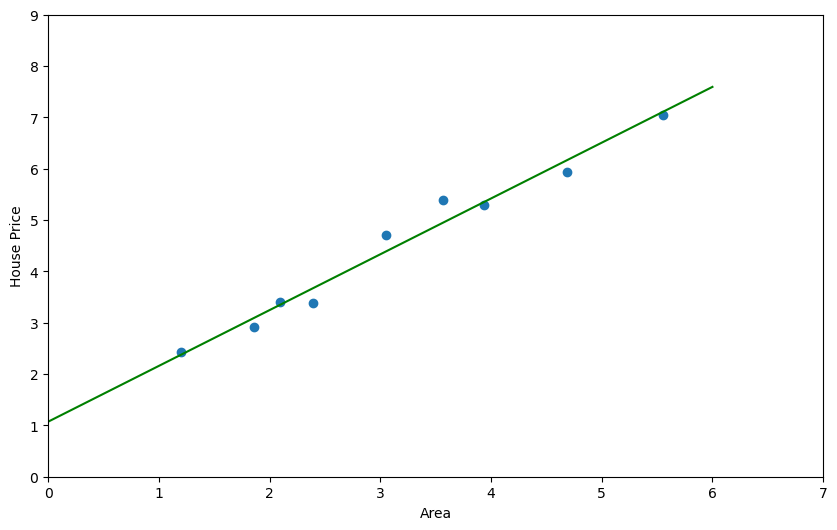

In [124]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_ylim((0, 9))
ax.set_xlim((0, 7))

plt.scatter(X[:, 0], y_data)
plt.ylabel('House Price')
plt.xlabel('Area')

x_data = list(range(0, 7))
line_y = [1.0870461272074028*x + 1.0719645914189169 for x in x_data]
plt.plot(x_data, line_y,c='green')   

<div style='background-color:  #fffbe6; padding: 15px; border-radius: 5px; margin-bottom: 20px; color: black; border-left: 5px solid red;'>
    <h1 style='text-align: center; margin: 0; color: red;'>Travelling Salesman (Bài toán người du lịch)</h1>
</div>



<div style="background-color: #fffbe6; padding: 15px; border-radius: 5px; margin-bottom: 20px; color: black; border-left: 5px solid #faad14;">    
    <h3 style="margin: 0; color: #faad14;">📌 Tóm tắt và mô tả bài toán</h3>
    <div style="margin: 10px 0 0; font-weight: bold; text-align: center; font-size: 16px;">
        PIPELINE CHUNG CHO BÀI TOÁN
    </div>
    <div style="margin: 10px 0 0; font-weight: bold;  font-size: 16px;">
🔹 Phát biểu bài toán:
        
- Có 5 thành phố được đánh số từ 1 đến 5 được nối với nhau, một người muốn đi từ 1 thành phố, qua tất cả các thành phố khác và trở về thành phố ban đầu,với chi phí nhỏ nhất. Hãy thiết lập tuyến đường cho người này. 
- Dữ liệu mô tả các thành phố và chi phí giữa chúng là một mảng 2 chiều.
- Dòng và cột đầu tiên là tên các thành phố.
- Các giá trị còn lại biểu diễn chi phí đi lại của hai thành phố tương ứng.
- Với những thành phố không nối trực tiếp với nhau, ta cho chi phí là một số lớn.
<img src="Screenshot 2025-06-03 194451.png" width="300" style="display: block; margin: auto;">
<img src="Screenshot 2025-06-03 194105.png" width="300" style="display: block; margin: auto;">


</div>




<div style='background-color: #e6f7ff; padding: 15px; border-radius: 5px; margin-bottom: 20px; color: black; border-left: 5px solid #1890ff;'>    
    <h1 style='margin: 0; color: #1890ff;'>ℹ️ Thông tin</h1>
    <p>
        <h2  style='text-align: center; margin: 0; color: red;'>Cài đặt dùng thuật toán Brute Force (duyệt toàn bộ - đệ quy quay lui để giải quyết bài toán)</h2>
<br>
    </p>
</div>

In [152]:
def load_data():
    map = []
    file = open('data_route.txt', 'r')
    lines = file.readlines()
    
    # bỏ header
    for i in range(1, len(lines)):
        strings = lines[i].split(',')
        
        # bỏ cột đầu tiên
        prices = [int(s.strip()) for s in strings[1:]]
        map.append(prices)
    file.close()
    return map

def tsp_brute_force(distance):
    n = len(distance)
    start = 0;
    cities = [x for x in range(n) if x != start]

    min_path = None
    min_cost = float('inf')


    # Hàm đệ quy sinh hoán vị
    def generate_permutations(current, remaining):
        nonlocal min_path, min_cost
        if not remaining:
            path = [start] + current + [start]
            cost = sum(distance[path[i]][path[i+1]] for i in range(len(path) - 1))
            if cost < min_cost:
                min_cost = cost
                min_path = path
        else:
            for i in range(len(remaining)):
                generate_permutations(current + [remaining[i]], remaining[:i] + remaining[i+1:])

    generate_permutations([], cities) ## Khởi tạo quá trình đệ quy
    
    return min_path, min_cost


if __name__ == "__main__":
    map = load_data()
    print('load_data')
    print(map)
    min_path, min_cost = tsp_brute_force(map)

    print(min_path)
    print(min_cost)


load_data
[[1000, 12, 1000, 5, 7], [12, 1000, 14, 1000, 18], [1000, 14, 1000, 6, 19], [5, 1000, 6, 1000, 2], [7, 18, 19, 2, 1000]]
[0, 1, 2, 3, 4, 0]
41


<div style='background-color: #e6f7ff; padding: 15px; border-radius: 5px; margin-bottom: 20px; color: black; border-left: 5px solid #1890ff;'>    
    <h1 style='margin: 0; color: #1890ff;'>ℹ️ Thông tin</h1>
    <p>
        <h2  style='text-align: center; margin: 0; color: red;'>Cài đặt giải thuật GA để giải quyết bài toán</h2>
<br>
    </p>
</div>

In [36]:
import random

n = 5    # so luong thanh pho
m = 400  # so luong ca the trong quan the
n_generations = 1000 # so vong doi
losses = []          # de ve bieu de losses

# load data
def load_data():
    map = []
    file = open('data_route.txt', 'r')
    lines = file.readlines()
    
    # bỏ header
    for i in range(1, len(lines)):
        strings = lines[i].split(',')
        
        # bỏ cột đầu tiên
        prices = [int(s.strip()) for s in strings[1:]]
        map.append(prices)
    file.close()
    return map

map = load_data()
print('load_data')
print(map)


# tao individual
def create_individual():
    # list cac thanh pho    
    return [random.randint(1,n) for _ in range(n)]

# tinh loss
def compute_loss(individual):
    i = 0
    price = 0
    while i < n-1:
        a = individual[i] - 1
        b = individual[i+1] - 1
        price += map[a][b]
        i += 1
    # cong voi quang duong tp cuoi ve tp dau
    start = individual[0] - 1
    finish = individual[n-1] - 1
    price += map[finish][start]
    
    # kiểm tra xem individual có chứa hết thành phố không
    s = set(individual)
    price += ((n-len(s)) * 1000)
    
    return price


# tinh fitness
def compute_fitness(individual):
    loss = compute_loss(individual)
    return 1 / (1 + loss)

# chon loc
def selection(sorted_population):
    index1 = random.randint(0, n-2)
    while True:
        index2 = random.randint(0, n-2)
        if index2 != index1:
            break
    individual = sorted_population[index1]
    if index2 > index1:
        individual = sorted_population[index2]
    return individual

# lai ghep:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(n):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]            
    
    return individual1_new, individual2_new

# dot bien
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    
    for i in range(n):
        if random.random() < mutation_rate:
            individual_m[i] = random.randint(1,n)
        
    return individual_m

# tao quan the moi
def create_new_population(soted_old_population):
    # luu vao losses
    losses.append(compute_loss(sorted_old_population[-1]))
    
    # in cac gia tri tot nhat qua tung doi
    # print(losses[-1])
    new_population = []
    while len(new_population) < m-2:
        # chon loc
        individual1 = selection(sorted_old_population)
        individual2 = selection(sorted_old_population)

        # lai ghep
        individual_c1, individual_c2 = crossover(individual1, individual2)

        # dot bien
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
    
        # cho vao quan the moi
        new_population.append(individual_m1)
        new_population.append(individual_m2)
    
    # cho 2 con dep nhat cua quan the cu vao quan the moi
    new_population.append(sorted_old_population[-1])
    new_population.append(sorted_old_population[-2])

    return new_population

# tao quan the ban dau
population = [create_individual() for _ in range(m)]

for _ in range(n_generations):
    sorted_old_population = sorted(population, key = compute_fitness)
    population = create_new_population(sorted_old_population)

# hien thi tuyen duong ngan nhat
route_min = sorted_old_population[-1]
route_min.append(sorted_old_population[-1][0])
print('duong di ngan nhat: ', route_min, 'chi phi: ', losses[-1])

load_data
[[1000, 12, 1000, 5, 7], [12, 1000, 14, 1000, 18], [1000, 14, 1000, 6, 19], [5, 1000, 6, 1000, 2], [7, 18, 19, 2, 1000]]
duong di ngan nhat:  [4, 3, 2, 1, 5, 4] chi phi:  41


<div style='background-color:  #fffbe6; padding: 15px; border-radius: 5px; margin-bottom: 20px; color: black; border-left: 5px solid red;'>
    <h1 style='text-align: center; margin: 0; color: red;'>Knapsack (Bài toán Cái túi)</h1>
</div>

<div style="background-color: #fffbe6; padding: 15px; border-radius: 5px; margin-bottom: 20px; color: black; border-left: 5px solid #faad14;">    
    <h3 style="margin: 0; color: #faad14;">📌 Tóm tắt và mô tả bài toán</h3>
    <div style="margin: 10px 0 0; font-weight: bold; text-align: center; font-size: 16px;">
        PIPELINE CHUNG CHO BÀI TOÁN
    </div>
    <div style="margin: 10px 0 0; font-weight: bold;  font-size: 16px;">
🔹 Phát biểu bài toán:
        
- Có $n $ vật có giá trị và cân nặng có trước, hãy để $n$ vật này vào một cái túi có sức chứa tối đa max weight = $M$ kg sao cho giá trị trong chiếc túi là lớn nhất.
- Ở trong file này ta xét bài toán với $n = 12$ và $M = 70$ kg

<img src="vbjvCeRA.png" width="300" style="display: block; margin: auto;">



</div>






Best fitness:  91 Individual:  [1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0]
Best fitness:  89 Individual:  [1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0]
Best fitness:  97 Individual:  [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0]
Best fitness:  95 Individual:  [0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0]
Best fitness:  95 Individual:  [0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0]
Best fitness:  90 Individual:  [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]
Best fitness:  92 Individual:  [0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0]
Best fitness:  97 Individual:  [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0]
Best fitness:  88 Individual:  [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]
Best fitness:  95 Individual:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
Best fitness:  88 Individual:  [0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0]
Best fitness:  86 Individual:  [1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0]
Best fitness:  88 Individual:  [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0]
Best fitness:  95 Individual:  [0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0]
Best fitness:  97 Individual:  [0, 0, 0, 0, 1, 1

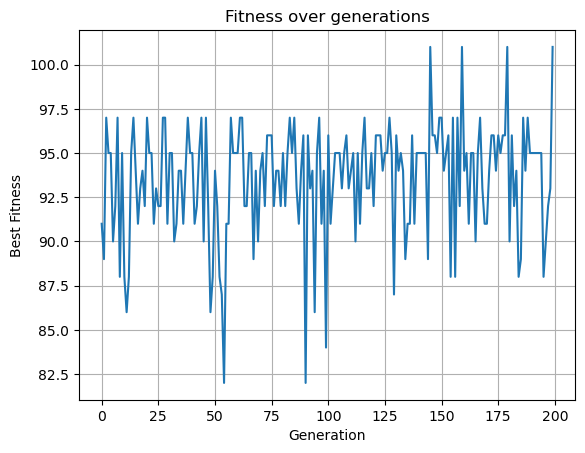

In [79]:
#------------------------------CODE CÁC TRÚC TRỪU TƯỢNG----------------------------------# 
import numpy as np
import matplotlib.pyplot as plt
import random

# Bước 1: Tạo ra được quần thể nhị phân gần n = 12 cá thể.
def get_nhi_phan():
    nhi_phan = random.randint(0, 1);
    return nhi_phan

def get_mot_chuoi_nhi_phan(n):
    chuoi_nhi_phan = [get_nhi_phan() for _ in range(n)]
    return chuoi_nhi_phan

def get_population(n, m):
    population = [get_mot_chuoi_nhi_phan(n) for _ in range(m)]
    return population

def compute_fitness(price, weight, individual, weight_max):
    W = sum([x_i * w_i for x_i, w_i in zip(individual, weight)])
    if W <= weight_max:
        fitness = sum([x_i * p_i for x_i, p_i in zip(individual, price)])
    else:
        fitness = 0;
        
    return fitness

def selection_individual(population):
    m = len(population)
    index_1 = random.randint(0, m - 1)
    index_2 = random.randint(0, m - 1)
    
    while index_1 == index_2:
        index_2 = random.randint(0, m - 1)

    parent = population[index_1]
    if index_2 > index_1:
        parent = population[index_2]

    return parent

def selection_population(price, weight, weight_max, population):
    m = len(population)
    n = len(population[0])

    fitness_value = []
    fitness = 0;
    for i in range(0, m, 1):
        fitness += compute_fitness(price, weight, population[i], weight_max)
        fitness_value.append(fitness)

    sum_fitness = sum(fitness_value)

    probibality = [f / (sum_fitness + 1e-6) for f in fitness_value]

    probability_sum = []
    xac_xuat = 0;
    for i in range(len(probibality)):
        xac_xuat += probibality[i]
        probability_sum.append(xac_xuat)

    selection_idx = []

    for _ in range(0, m):
        for i, x in enumerate(probability_sum):
            if x >= random.random():
                selection_idx.append(i)
                break

    selection_population = []
    for x in selection_idx:
        selection_population.append(population[x])

    return selection_population

### Hàm trao đổi chéo (crossover)

def crossover(individual1, individual2, crossover_rate):
    n = len(individual1);
    child_1 = individual1.copy();
    child_2 = individual2.copy();
    for i in range(0, n):
        if (random.random() < crossover_rate):
            child_1[i] = individual2[i];
            child_2[i] = individual1[i];

    return child_1, child_2

### Hàm tạo đột biến (mutation)

    
def mutate(child, mutation_rate):
    child_c = child.copy()
    n = len(child_c)
    for i in range(n):
        if random.random() < mutation_rate:
            child_c[i] = get_nhi_phan()
    return child_c

        
##---------------------------------------------------HÀM CHÍNH----------------------------------------------------##
def genetic_althorigm(population, price, weight, crossover_rate, mutation_rate, weight_max, n_generation, elimst):
    m = len(population)
    n = len(population[0])

    losses_value = []
    
    start_population = population
    
    for i in range(n_generation):
        population_selection = selection_population(price, weight, weight_max, start_population)

        sorted_population = sorted(population_selection, key = lambda ind: compute_fitness(price, weight, ind, weight_max))

        print("Best fitness: ", compute_fitness(price, weight, sorted_population[-1], weight_max), "Individual: ", sorted_population[-1])
        losses_value.append(compute_fitness(price, weight, sorted_population[-1], weight_max))
    
        new_generation = sorted_population[elimst:]

        while len(new_generation) < len(population_selection):
            # Chọn lọc cá thể 
            parent_1 = selection_individual(population)
            parent_2 = selection_individual(population)

            # Trao đổi chéo
            child_1, child_2 = crossover(parent_1, parent_2, crossover_rate)

            # Tạo đột biến
            child1_mutation = mutate(child_1, mutation_rate)
            child2_mutation = mutate(child_2, mutation_rate)

            new_generation.append(child1_mutation)
            new_generation.append(child2_mutation)
    
        start_population = new_generation
    
        
    res = sorted(start_population, key = lambda ind: compute_fitness(price, weight, ind, weight_max))
    
    return res[-1], losses_value

if __name__ == "__main__":
    n = 12;
    m = 360;
    elimst = -2;
    crossover_rate = 0.9;
    mutation_rate = 0.1;
    n_generation = 200;

    # cho truoc du lieu
    weights = [1, 2, 5, 7, 10, 12, 15, 23, 32, 33, 35, 37]  # can nang cac vat
    prices =  [1, 3, 6, 7, 12, 15, 25, 32, 44, 45, 47, 50]  # gia tri cua cac vat tuong ung
    weight_max = 70;

    # Khởi tạo quần thể:
    population = get_population(n, m)

    individual, losses_value = genetic_althorigm(population, prices, weights, crossover_rate, mutation_rate, weight_max, n_generation, elimst)

    print(individual)

    # Vẽ đồ thị loss
    plt.plot(losses_value)
    plt.title("Fitness over generations")
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness")
    plt.grid(True)
    plt.show()
